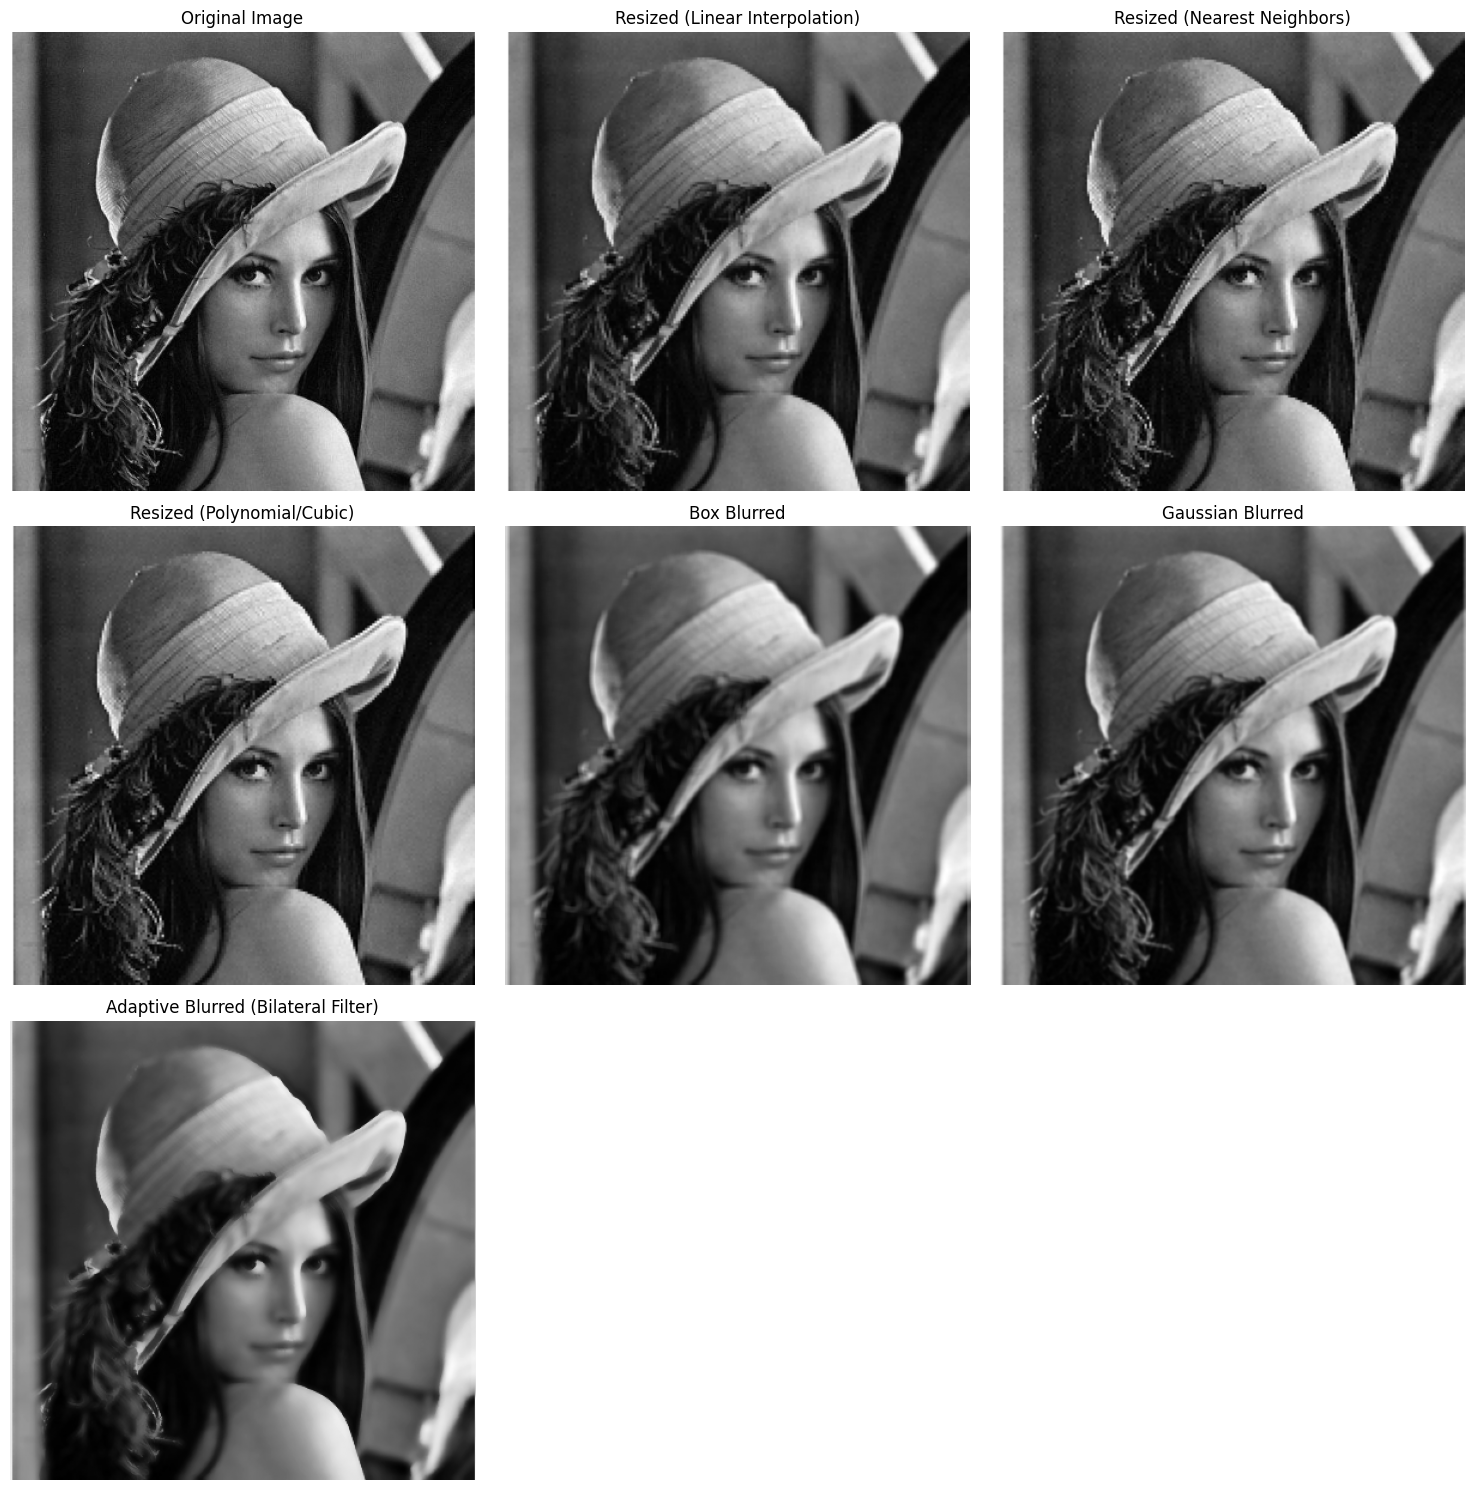

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an example image
image = cv2.imread('Picture.png', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Function to display images
def display_images(images, titles, cols=3):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Linear Interpolation
resized_linear = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

# Nearest Neighbors Interpolation
resized_nearest = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)

# Polynomial Interpolation (using cubic for demonstration)
resized_cubic = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# Box Blurring
box_blurred = cv2.blur(image, (5, 5))

# Gaussian Blurring
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive Blurring (using bilateral filter for adaptive effects)
adaptive_blurred = cv2.bilateralFilter(image, 9, 75, 75)

# Display results
images = [image, resized_linear, resized_nearest, resized_cubic, box_blurred, gaussian_blurred, adaptive_blurred]
titles = [
    "Original Image",
    "Resized (Linear Interpolation)",
    "Resized (Nearest Neighbors)",
    "Resized (Polynomial/Cubic)",
    "Box Blurred",
    "Gaussian Blurred",
    "Adaptive Blurred (Bilateral Filter)"
]

display_images(images, titles)



===== Random Forest Model Evaluation =====
Cross-Validation Accuracy Scores: [0.98611111 0.96875    0.95818815 0.97560976 0.97560976]
Mean CV Accuracy: 0.9729
Accuracy: 0.9722
Precision: 0.9726
Recall: 0.9722
F1-Score: 0.9722
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
AUC Score: 0.9998


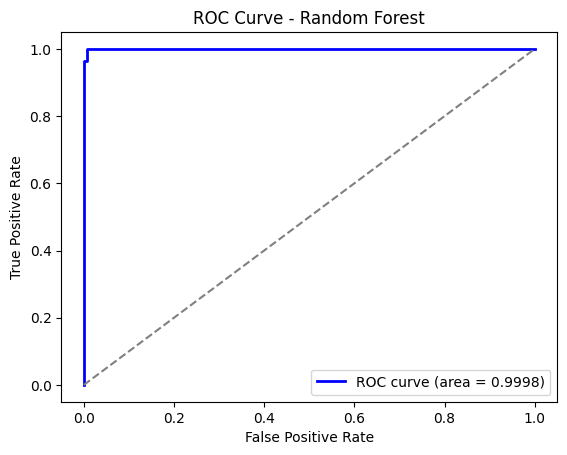


===== KNN Model Evaluation =====
Cross-Validation Accuracy Scores: [0.98611111 0.98611111 0.97909408 0.99303136 0.96515679]
Mean CV Accuracy: 0.9819
Accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F1-Score: 0.9861
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]
AUC Score: 1.0000


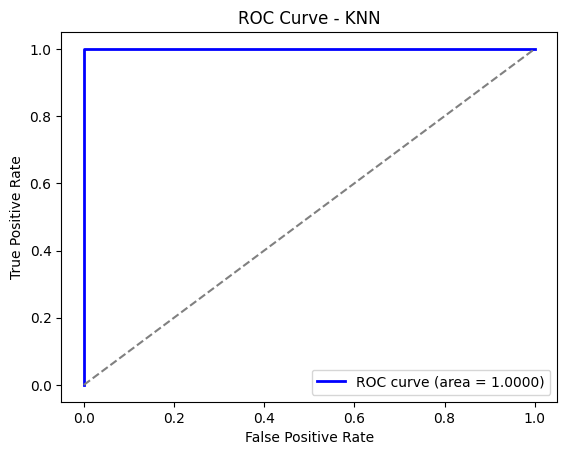

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load MNIST dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Apply K-Fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n===== {model_name} Model Evaluation =====")

    # Perform K-Fold Cross Validation
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")

    # Train the model on full training data
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # ROC and AUC (only for models that support probability predictions)
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")

        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
